In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("Twitter.csv")

In [4]:
print(df.head())

   Unnamed: 0             post_id                    post_created  \
0           0  637894677824413696  Sun Aug 30 07:48:37 +0000 2015   
1           1  637890384576778240  Sun Aug 30 07:31:33 +0000 2015   
2           2  637749345908051968  Sat Aug 29 22:11:07 +0000 2015   
3           3  637696421077123073  Sat Aug 29 18:40:49 +0000 2015   
4           4  637696327485366272  Sat Aug 29 18:40:26 +0000 2015   

                                           post_text     user_id  followers  \
0  It's just over 2 years since I was diagnosed w...  1013187241         84   
1  It's Sunday, I need a break, so I'm planning t...  1013187241         84   
2  Awake but tired. I need to sleep but my brain ...  1013187241         84   
3  RT @SewHQ: #Retro bears make perfect gifts and...  1013187241         84   
4  It’s hard to say whether packing lists are mak...  1013187241         84   

   friends  favourites  statuses  retweets  label  
0      211         251       837         0      1  
1     

In [5]:
import pandas as pd
import re
from gensim.parsing.preprocessing import STOPWORDS


# Load custom English stopwords from 'stopwords.txt'
with open('stopwords.txt', 'r', encoding='utf-8') as file:
    custom_stopwords = set(word.strip('\n') for word in file)

# Load additional Hinglish stopwords from 'stop_hinglish.txt'
with open('stop_hinglish.txt', 'r', encoding='utf-8') as file:
    hinglish_stopwords = set(word.strip('\n') for word in file)

# Combine Gensim's English stopwords with custom stopwords and Hinglish stopwords
stopwords = STOPWORDS.union(custom_stopwords).union(hinglish_stopwords)

# Function to remove stopwords
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stopwords])

# Function to remove links using regex
def remove_links(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

# Apply functions to the DataFrame
df['text_no_stopwords'] = df['post_text'].apply(remove_stopwords)
df['filtered'] = df['text_no_stopwords'].apply(remove_links)

# Display the result
print(df[['post_text', 'text_no_stopwords', 'filtered']])


                                               post_text  \
0      It's just over 2 years since I was diagnosed w...   
1      It's Sunday, I need a break, so I'm planning t...   
2      Awake but tired. I need to sleep but my brain ...   
3      RT @SewHQ: #Retro bears make perfect gifts and...   
4      It’s hard to say whether packing lists are mak...   
...                                                  ...   
19995              A day without sunshine is like night.   
19996  Boren's Laws: (1) When in charge, ponder. (2) ...   
19997  The flow chart is a most thoroughly oversold p...   
19998  Ships are safe in harbor, but they were never ...   
19999     Black holes are where God is dividing by zero.   

                                       text_no_stopwords  \
0      years diagnosed #anxiety #depression. Today ta...   
1         Sunday, break, planning spend possible #A14...   
2                      Awake tired. sleep brain ideas...   
3      RT @SewHQ: #Retro bears perfect 

In [6]:
import pandas as pd
import re
from gensim.parsing.preprocessing import STOPWORDS



# Load English stopwords from a file
with open('stopwords.txt', 'r', encoding='utf-8') as file:
    english_stopwords = set(word.strip('\n') for word in file)

# Load Hinglish stopwords from another file
with open('stop_hinglish.txt', 'r', encoding='utf-8') as file:
    hinglish_stopwords = set(word.strip('\n') for word in file)

# Combine all stopwords
stopwords = STOPWORDS.union(english_stopwords).union(hinglish_stopwords)

# Function to preprocess text
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove proper nouns
    text = ' '.join([word for word in text.split() if not word.istitle()])

    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Remove tagged people
    text = re.sub(r'@\w+', '', text)

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word.lower() not in stopwords])

    return text

# Apply preprocessing function to the DataFrame
df['filtered'] = df['filtered'].apply(preprocess_text)

# Display the result
print(df[['post_text', 'filtered']])


                                               post_text  \
0      It's just over 2 years since I was diagnosed w...   
1      It's Sunday, I need a break, so I'm planning t...   
2      Awake but tired. I need to sleep but my brain ...   
3      RT @SewHQ: #Retro bears make perfect gifts and...   
4      It’s hard to say whether packing lists are mak...   
...                                                  ...   
19995              A day without sunshine is like night.   
19996  Boren's Laws: (1) When in charge, ponder. (2) ...   
19997  The flow chart is a most thoroughly oversold p...   
19998  Ships are safe in harbor, but they were never ...   
19999     Black holes are where God is dividing by zero.   

                                                filtered  
0      years diagnosed anxiety depression taking mome...  
1                          break planning spend possible  
2                                tired sleep brain ideas  
3      RT SewHQ bears perfect gifts great b

In [7]:
from gensim import corpora, models
from pprint import pprint

# Assuming 'df' is your DataFrame and 'text_no_links' is the column containing preprocessed text
documents = df['filtered'].apply(lambda x: x.split())

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(documents)

# Create a bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10)

# Print the topics and associated words
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    pprint(topic)


(0,
 '0.048*"follow" + 0.018*"hananyxnyx" + 0.014*"LindaCurley37" + 0.013*"wish" + '
 '0.013*"change" + 0.010*"mom" + 0.008*"rhaeman" + 0.008*"money" + '
 '0.008*"beautiful" + 0.008*"girls"')
(1,
 '0.149*"RT" + 0.034*"YONG" + 0.021*"anytime" + 0.014*"ForYONG" + '
 '0.014*"WeArePAYTing" + 0.010*"PAYTForLuckySun" + 0.010*"year" + '
 '0.009*"bea_viel88" + 0.007*"wanna" + 0.007*"GoPAYTWin"')
(2,
 '0.049*"amp" + 0.038*"RT" + 0.020*"real" + 0.013*"great" + 0.012*"im" + '
 '0.012*"cameronhoodkin" + 0.009*"sorry" + 0.009*"live" + 0.008*"10" + '
 '0.008*"care"')
(3,
 '0.031*"man" + 0.028*"day" + 0.021*"today" + 0.014*"girl" + 0.009*"week" + '
 '0.009*"realDonaldTrump" + 0.008*"times" + 0.008*"FoxNews" + 0.007*"days" + '
 '0.007*"leave"')
(4,
 '0.019*"life" + 0.016*"JoeNBC" + 0.014*"hard" + 0.014*"watch" + 0.013*"ass" + '
 '0.013*"gt" + 0.012*"vnndrws" + 0.010*"white" + 0.009*"AMERICA" + 0.008*"fun"')
(5,
 '0.020*"friend" + 0.019*"wait" + 0.016*"years" + 0.014*"mind" + 0.014*"talk" '
 '+ 0.011*"

Number of tweets:  20000


(5, 106)
     people       one      love       get       i'm     dont      like  \
0  0.001884  0.001838  0.001784  0.001672  0.001626  0.00159  0.001582   
1  0.000000  0.000000  0.000000  0.000000  0.001735  0.00000  0.001206   
2  0.000000  0.000000  0.000000  0.000000  0.001426  0.00000  0.001269   
3  0.000000  0.000000  0.000740  0.000000  0.000000  0.00000  0.000000   
4  0.000945  0.001357  0.000000  0.000000  0.001131  0.00000  0.001825   

         go      play       see  ...     think  already        a…     watch  \
0  0.001518  0.001493  0.001452  ...  0.000000  0.00000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  ...  0.000000  0.00000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  ...  0.000000  0.00000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  ...  0.000000  0.00000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  ...  0.001253  0.00125  0.001215  0.001181   

   everyone     still      yeah       wow  cleaning     least  
0  0.00

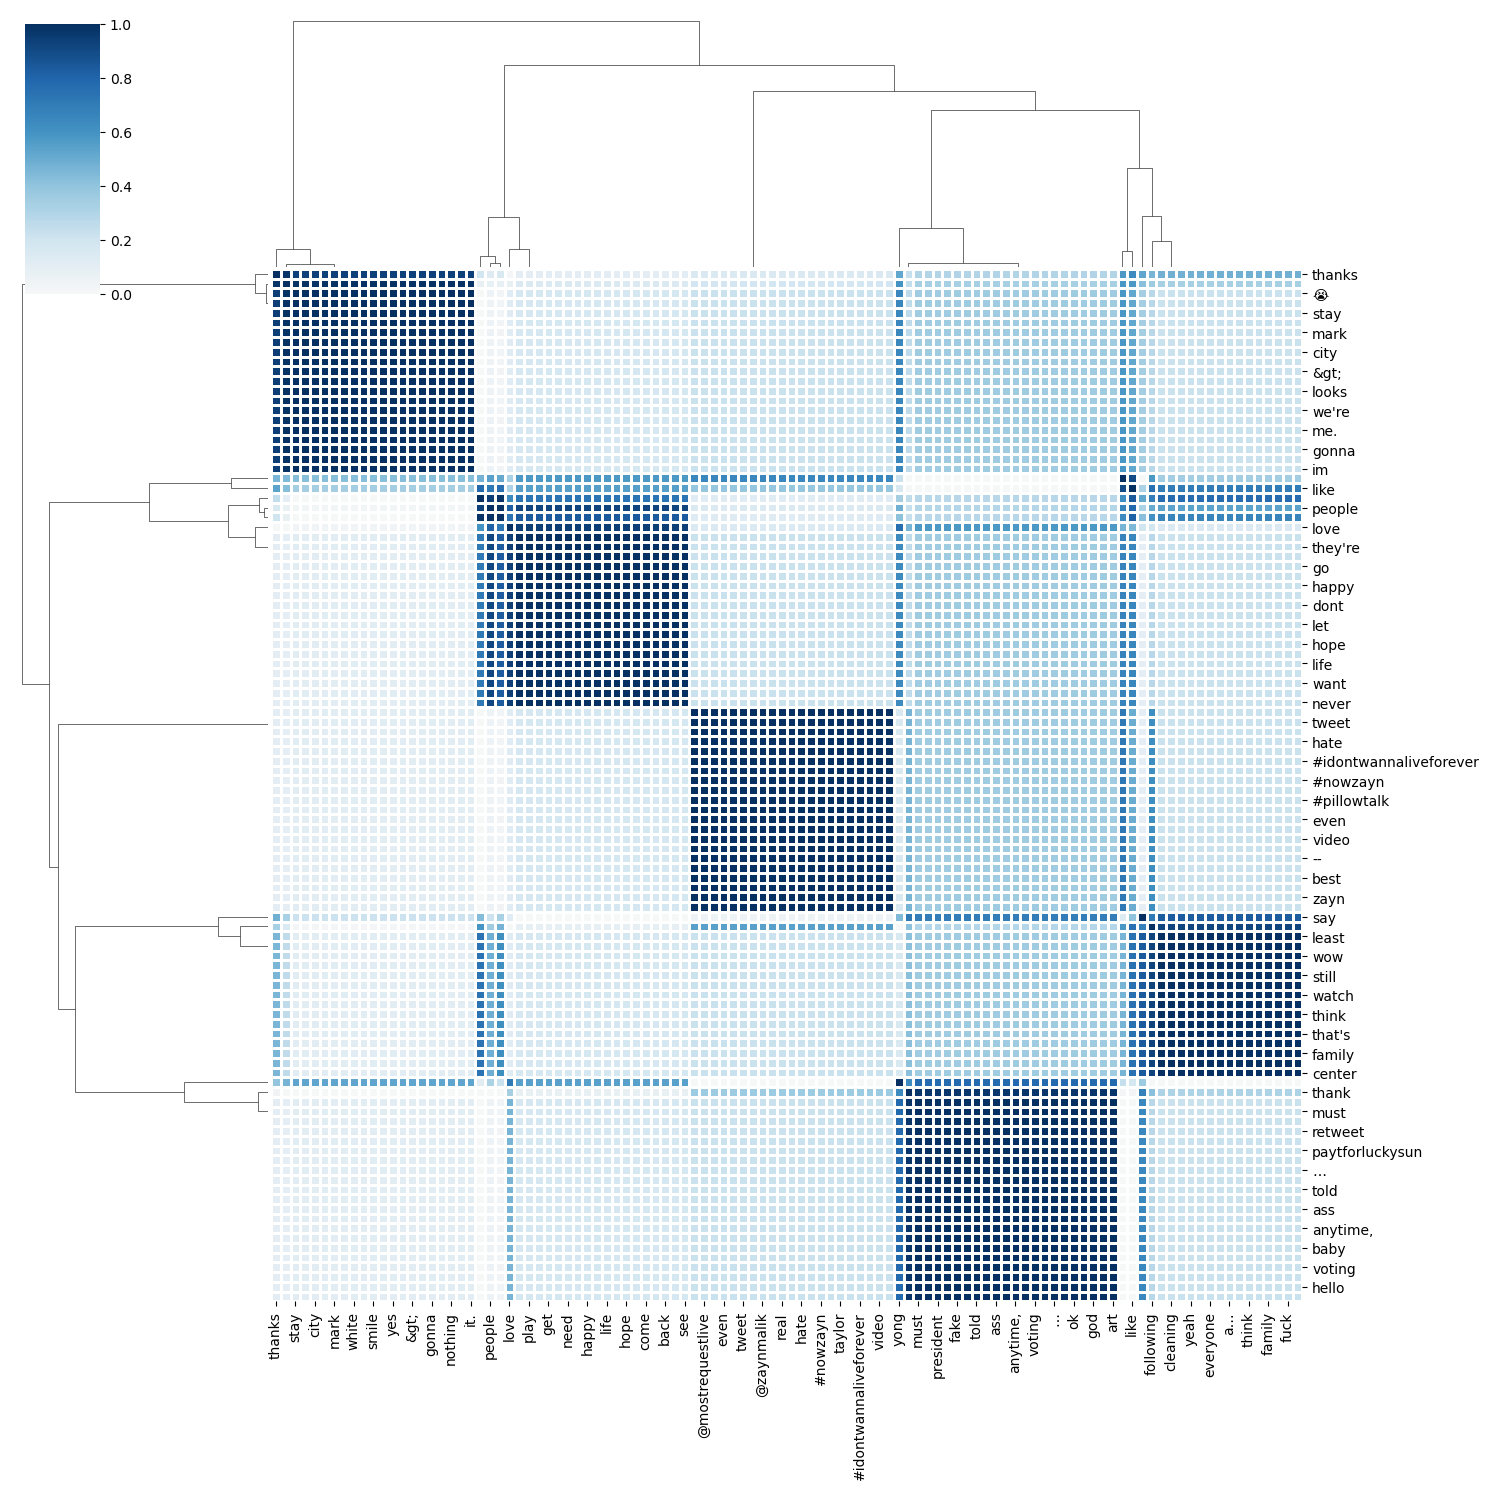

In [8]:
import os
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile

init_notebook_mode(connected=True)  # do not miss this line

import warnings
warnings.filterwarnings("ignore")

# Load your mental health tweets dataset
datafile = 'Twitter.csv'  # Replace with the actual file path
tweets = pd.read_csv(datafile)

# Display the first 5 rows of your dataset
print("Number of tweets: ", len(tweets['post_text']))
tweets.head(5)

# Custom stopwords for mental health tweets
custom_stopwords = set(stopwords.words('english') + list(punctuation) + ['rt', 'via', ...])  # Add your custom stopwords

# Convert 'post_created' to datetime
tweets['post_created'] = pd.to_datetime(tweets['post_created'])

# Plot tweet activity over time
trace = go.Histogram(
    x=tweets['post_created'],
    marker=dict(
        color='blue'
    ),
    opacity=0.75
)

layout = go.Layout(
    title='Tweet Activity Over Time',
    height=450,
    width=1200,
    xaxis=dict(
        title='Date and Time'
    ),
    yaxis=dict(
        title='Tweet Quantity'
    ),
    bargap=0.2,
)

data = [trace]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# Preparing a corpus for analysis
corpus = [str(tweet) for tweet in tweets['post_text']]
texts = [[word for word in str(document).lower().split() if word not in custom_stopwords] for document in corpus]

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(tempfile.gettempdir(), 'mental_health.dict'))
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(tempfile.gettempdir(), 'mental_health.mm'), corpus)

# TF-IDF transformation
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# LDA transformation
total_topics = 5  # Adjust the number of topics as needed
lda = models.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf]

# Show first n important words in the topics
lda.show_topics(total_topics, 5)

# Create DataFrame for LDA results
data_lda = {i: OrderedDict(lda.show_topic(i, 25)) for i in range(total_topics)}
df_lda = pd.DataFrame(data_lda).fillna(0).T

# Display the shape and DataFrame
print(df_lda.shape)
print(df_lda)

# Clustermap for LDA results
import matplotlib.pyplot as plt
g = sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(15, 15))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()


In [11]:
import pandas as pd
import re
from collections import Counter

# Assuming 'df' is your DataFrame and 'post_text' is the column containing post text
hashtags = df['post_text'].apply(lambda x: re.findall(r'#\w+', str(x)))

# Flatten the list of hashtags
flat_hashtags = [tag.lower() for sublist in hashtags for tag in sublist]
#print(flat_hashtags)


# Count the occurrences of each hashtag
hashtag_counts = Counter(flat_hashtags)
#print(hashtag_counts)

# Get the most common hashtags and their counts
most_common_hashtags = hashtag_counts.most_common()

# Display the top N hashtags (adjust N as needed)
top_n = 55
print(f"Top {top_n} hashtags:")
for tag, count in most_common_hashtags[:top_n]:
    print(f"{tag}: {count}")


Top 55 hashtags:
#bestmusicvideo: 108
#pillowtalk: 105
#iheartawards: 105
#autism: 69
#mnwild: 60
#addiction: 55
#bbmas: 51
#depression: 48
#yongkissreturnonpbb: 45
#anxiety: 39
#mentalhealth: 32
#mostrequestedlive: 30
#now2016: 30
#nowzayn: 30
#nbavote: 29
#parenting: 25
#idontwannaliveforever: 25
#bellletstalk: 24
#mental: 23
#children: 23
#massage: 22
#heyeverybodymusicvideo: 22
#leo: 22
#lions: 21
#mentalillness: 20
#nfl: 19
#child: 17
#health: 17
#relationships: 17
#vegan: 17
#adhd: 16
#1: 16
#autismawareness: 16
#39: 16
#riverdale: 16
#bipolar: 14
#thenewbrokenscene: 14
#5sos: 14
#patriots: 13
#lyingdonaldtrump: 13
#gamedaytobrookings: 12
#httr: 12
#teens: 11
#recovery: 11
#abuse: 11
#payouthforum: 11
#shadowhunters: 11
#mnf: 11
#ck: 11
#suicide: 10
#counseling: 10
#autism24: 10
#heyeverybody: 10
#5sosfam: 10
#crochet: 9


In [14]:
import pandas as pd
import re

# Assuming 'df' is your DataFrame and 'filtered' is the column containing filtered tweets
df['hashtags'] = df['filtered'].apply(lambda x: re.findall(r'#\w+', str(x).lower()))

# Create a new column 'hashtags_text' with comma-separated hashtags
df['hashtags_text'] = df['hashtags'].apply(lambda x: ', '.join(x) if x else '')

# Display the DataFrame with the new 'hashtags_text' column
print(df[['filtered', 'hashtags_text']])
print(df.head(50))


                                                filtered hashtags_text
0      years diagnosed anxiety depression taking mome...              
1                          break planning spend possible              
2                                tired sleep brain ideas              
3      RT SewHQ bears perfect gifts great beginners s...              
4      hard packing lists making life easier reinforc...              
...                                                  ...           ...
19995                                 day sunshine night              
19996  Borens charge ponder trouble delegate doubt mu...              
19997          flow oversold piece program documentation              
19998                             safe harbor meant stay              
19999                                holes dividing zero              

[20000 rows x 2 columns]
    Unnamed: 0             post_id                    post_created  \
0            0  637894677824413696  Sun Aug 30 07:48

In [15]:
import pandas as pd
import re
from collections import Counter

# Assuming 'df' is your DataFrame and 'filtered' is the column containing filtered tweets
hashtags_and_tweets = df[['filtered']].copy()

# Extract hashtags from the 'filtered' column
hashtags_and_tweets['hashtags'] = df['filtered'].apply(lambda x: re.findall(r'#\w+', str(x).lower()))

# Display the DataFrame with hashtags
print(hashtags_and_tweets)


                                                filtered hashtags
0      years diagnosed anxiety depression taking mome...       []
1                          break planning spend possible       []
2                                tired sleep brain ideas       []
3      RT SewHQ bears perfect gifts great beginners s...       []
4      hard packing lists making life easier reinforc...       []
...                                                  ...      ...
19995                                 day sunshine night       []
19996  Borens charge ponder trouble delegate doubt mu...       []
19997          flow oversold piece program documentation       []
19998                             safe harbor meant stay       []
19999                                holes dividing zero       []

[20000 rows x 2 columns]


In [73]:
# Assuming 'df' is your DataFrame and 'row_number' is the index of the row you want to print
row_number = 94  # Replace this with the desired row index
columns_to_print = ['filtered', 'hashtags_text']  # Replace with your desired column names
specific_row_columns = df.loc[row_number, columns_to_print]

# Display the specific columns of the row
print(specific_row_columns)

filtered         muggy weather cambridge weather
hashtags_text                                   
Name: 94, dtype: object


In [16]:
import pandas as pd
import re

# Example DataFrame with a tweet containing hashtags


# Extract hashtags from the 'post_text' column and create a new column 'hashtags'
df['hashtags'] = df['post_text'].apply(lambda x: re.findall(r'#\w+', str(x).lower()))

# Display the DataFrame with hashtags
print(df)

# Print specific row with hashtags
row_index = 94 # Adjust the row index as needed
specific_row = df.loc[row_index]
print(f"\nRow at index {row_index} with hashtags:\n{specific_row}")


       Unnamed: 0             post_id                    post_created  \
0               0  637894677824413696  Sun Aug 30 07:48:37 +0000 2015   
1               1  637890384576778240  Sun Aug 30 07:31:33 +0000 2015   
2               2  637749345908051968  Sat Aug 29 22:11:07 +0000 2015   
3               3  637696421077123073  Sat Aug 29 18:40:49 +0000 2015   
4               4  637696327485366272  Sat Aug 29 18:40:26 +0000 2015   
...           ...                 ...                             ...   
19995       19995  819336825231773698  Thu Jan 12 00:14:56 +0000 2017   
19996       19996  819334654260080640  Thu Jan 12 00:06:18 +0000 2017   
19997       19997  819334503042871297  Thu Jan 12 00:05:42 +0000 2017   
19998       19998  819334419374899200  Thu Jan 12 00:05:22 +0000 2017   
19999       19999  819334270825197568  Thu Jan 12 00:04:47 +0000 2017   

                                               post_text     user_id  \
0      It's just over 2 years since I was diagnosed

In [17]:
print(df)

       Unnamed: 0             post_id                    post_created  \
0               0  637894677824413696  Sun Aug 30 07:48:37 +0000 2015   
1               1  637890384576778240  Sun Aug 30 07:31:33 +0000 2015   
2               2  637749345908051968  Sat Aug 29 22:11:07 +0000 2015   
3               3  637696421077123073  Sat Aug 29 18:40:49 +0000 2015   
4               4  637696327485366272  Sat Aug 29 18:40:26 +0000 2015   
...           ...                 ...                             ...   
19995       19995  819336825231773698  Thu Jan 12 00:14:56 +0000 2017   
19996       19996  819334654260080640  Thu Jan 12 00:06:18 +0000 2017   
19997       19997  819334503042871297  Thu Jan 12 00:05:42 +0000 2017   
19998       19998  819334419374899200  Thu Jan 12 00:05:22 +0000 2017   
19999       19999  819334270825197568  Thu Jan 12 00:04:47 +0000 2017   

                                               post_text     user_id  \
0      It's just over 2 years since I was diagnosed

In [76]:
from gensim import corpora, models
from pprint import pprint
import pandas as pd
import re



# Extract tweets with the hashtag #depression
tweets_with_depression = df[df['hashtags'].apply(lambda x: '#depression' in x)]

# Assuming 'filtered' is your preprocessed text column
documents = tweets_with_depression['filtered'].apply(lambda x: x.split())

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(documents)

# Create a bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Print the topics and associated words
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    pprint(topic)


(0,
 '0.104*"depression" + 0.039*"symptoms" + 0.039*"difference" + 0.039*"low" + '
 '0.039*"risk" + 0.039*"boosts" + 0.039*"mood" + 0.039*"teens" + 0.039*"aware" '
 '+ 0.006*"pain"')
(1,
 '0.166*"depression" + 0.030*"RT" + 0.030*"lead" + 0.016*"map" + '
 '0.016*"antidepressants" + 0.016*"vinylarm" + 0.016*"brain" + '
 '0.016*"targeted" + 0.016*"desire" + 0.016*"feel"')
(2,
 '0.089*"depression" + 0.055*"anxiety" + 0.055*"BellLetsTalk" + '
 '0.037*"treatment" + 0.037*"MentalHealth" + 0.037*"amp" + 0.037*"effective" + '
 '0.020*"today" + 0.020*"energy" + 0.020*"RT"')
(3,
 '0.113*"depression" + 0.048*"label" + 0.048*"signs" + 0.026*"health" + '
 '0.026*"mental" + 0.026*"anxiety" + 0.026*"diagnosed" + 0.026*"RT" + '
 '0.026*"moment" + 0.026*"Whats"')
(4,
 '0.254*"depression" + 0.035*"BellLetsTalk" + 0.035*"lost" + 0.034*"anxiety" + '
 '0.034*"sucks" + 0.019*"bed" + 0.019*"suffering" + 0.019*"million" + '
 '0.019*"pls" + 0.019*"children"')


In [78]:
from gensim import corpora, models
from pprint import pprint
import pandas as pd
import re



# Extract tweets with the hashtag #depression
tweets_with_depression = df[df['hashtags'].apply(lambda x: '#addiction' in x)]

# Assuming 'filtered' is your preprocessed text column
documents = tweets_with_depression['filtered'].apply(lambda x: x.split())

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(documents)

# Create a bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Print the topics and associated words
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    pprint(topic)

(0,
 '0.226*"addiction" + 0.042*"substance" + 0.042*"abuse" + 0.029*"recovery" + '
 '0.029*"minor" + 0.029*"undermine" + 0.016*"substanceabuse" + 0.016*"floor" + '
 '0.016*"child" + 0.016*"overdose"')
(1,
 '0.204*"addiction" + 0.027*"high" + 0.027*"coworker" + 0.027*"job" + '
 '0.027*"noticed" + 0.027*"food" + 0.027*"changing" + 0.027*"habits" + '
 '0.027*"handle" + 0.027*"nicotine"')
(2,
 '0.081*"addiction" + 0.031*"internet" + 0.031*"porn" + 0.031*"living" + '
 '0.031*"worth" + 0.031*"live" + 0.031*"survivors" + 0.031*"lives" + '
 '0.031*"intend" + 0.031*"helping"')
(3,
 '0.265*"addiction" + 0.042*"habit" + 0.029*"alcoholism" + 0.016*"watching" + '
 '0.016*"drink" + 0.016*"craving" + 0.016*"trigger" + 0.016*"impacts" + '
 '0.016*"free" + 0.016*"epidemic"')
(4,
 '0.119*"addiction" + 0.063*"drug" + 0.034*"meth" + 0.034*"crystal" + '
 '0.034*"effects" + 0.034*"harmful" + 0.034*"phone" + 0.034*"hunchbacks" + '
 '0.034*"smart" + 0.034*"battled"')


In [79]:
from gensim import corpora, models
from pprint import pprint
import pandas as pd
import re



# Extract tweets with the hashtag #depression
tweets_with_depression = df[df['hashtags'].apply(lambda x: '#anxiety' in x)]

# Assuming 'filtered' is your preprocessed text column
documents = tweets_with_depression['filtered'].apply(lambda x: x.split())

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(documents)

# Create a bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Print the topics and associated words
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    pprint(topic)

(0,
 '0.111*"children" + 0.077*"anxiety" + 0.042*"disorders" + 0.042*"prevented" + '
 '0.042*"inherit" + 0.042*"legitimate" + 0.007*"counter" + 0.007*"signs" + '
 '0.007*"calm" + 0.007*"suffer"')
(1,
 '0.062*"label" + 0.051*"anxiety" + 0.034*"RT" + 0.034*"BellLetsTalk" + '
 '0.034*"health" + 0.034*"Whats" + 0.034*"mental" + 0.034*"OCD" + '
 '0.034*"MentalHealthAm" + 0.034*"define"')
(2,
 '0.085*"anxiety" + 0.058*"amp" + 0.058*"depression" + 0.058*"effective" + '
 '0.058*"treatment" + 0.032*"excessive" + 0.032*"stop" + 0.032*"worrying" + '
 '0.032*"BellLetsTalk" + 0.032*"things"')
(3,
 '0.058*"worrier" + 0.011*"anxiety" + 0.010*"delusion" + 0.010*"signs" + '
 '0.010*"suffer" + 0.010*"counter" + 0.010*"calm" + 0.010*"men" + 0.010*"life" '
 '+ 0.010*"BellLetsTalk"')
(4,
 '0.202*"anxiety" + 0.031*"depression" + 0.024*"life" + 0.023*"RT" + '
 '0.016*"mentalhealth" + 0.016*"expressed" + 0.016*"worry" + 0.016*"concern" + '
 '0.016*"worrying" + 0.016*"BellLetsTalk"')


In [21]:
# Extract tweets with the hashtag #depression
tweets_with_depression = df[df['hashtags'].apply(lambda x: '#suicide' in x)]

# Assuming 'filtered' is your preprocessed text column
documents = tweets_with_depression['filtered'].apply(lambda x: x.split())

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(documents)

# Create a bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Print the topics and associated words
topics = lda_model.print_topics(num_words=15)
for topic in topics:
    pprint(topic)

(0,
 '0.143*"suicide" + 0.143*"increases" + 0.143*"surgery" + 0.143*"risk" + '
 '0.024*"community" + 0.024*"attempt" + 0.024*"prevent" + 0.024*"rates" + '
 '0.024*"committed" + 0.024*"threats" + 0.024*"rising" + 0.024*"loved" + '
 '0.024*"making" + 0.024*"commits" + 0.024*"bipolar"')
(1,
 '0.234*"suicide" + 0.128*"making" + 0.128*"threats" + 0.128*"prevent" + '
 '0.021*"community" + 0.021*"attempt" + 0.021*"rates" + 0.021*"loved" + '
 '0.021*"committed" + 0.021*"rising" + 0.021*"diagnosed" + 0.021*"risk" + '
 '0.021*"bipolar" + 0.021*"weeks" + 0.021*"commits"')
(2,
 '0.164*"suicide" + 0.090*"men" + 0.090*"die" + 0.090*"substance" + '
 '0.090*"abuse" + 0.090*"white" + 0.090*"loved" + 0.090*"committed" + '
 '0.015*"community" + 0.015*"attempt" + 0.015*"prevent" + 0.015*"threats" + '
 '0.015*"rates" + 0.015*"rising" + 0.015*"making"')
(3,
 '0.272*"suicide" + 0.078*"diagnosed" + 0.078*"commits" + 0.078*"weeks" + '
 '0.078*"bipolar" + 0.078*"rising" + 0.078*"rates" + 0.078*"attempt" + '
 '0

In [18]:
print(df.columns)

Index(['Unnamed: 0', 'post_id', 'post_created', 'post_text', 'user_id',
       'followers', 'friends', 'favourites', 'statuses', 'retweets', 'label',
       'text_no_stopwords', 'filtered', 'hashtags', 'hashtags_text'],
      dtype='object')


In [19]:
# Assuming 'df' is your DataFrame
if 'hashtags_text' in df.columns:
    df = df.drop('hashtags_text', axis=1)

# Now 'hashtags_text' column is deleted
print(df.head())


   Unnamed: 0             post_id                    post_created  \
0           0  637894677824413696  Sun Aug 30 07:48:37 +0000 2015   
1           1  637890384576778240  Sun Aug 30 07:31:33 +0000 2015   
2           2  637749345908051968  Sat Aug 29 22:11:07 +0000 2015   
3           3  637696421077123073  Sat Aug 29 18:40:49 +0000 2015   
4           4  637696327485366272  Sat Aug 29 18:40:26 +0000 2015   

                                           post_text     user_id  followers  \
0  It's just over 2 years since I was diagnosed w...  1013187241         84   
1  It's Sunday, I need a break, so I'm planning t...  1013187241         84   
2  Awake but tired. I need to sleep but my brain ...  1013187241         84   
3  RT @SewHQ: #Retro bears make perfect gifts and...  1013187241         84   
4  It’s hard to say whether packing lists are mak...  1013187241         84   

   friends  favourites  statuses  retweets  label  \
0      211         251       837         0      1   
1   